In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json


## Load tax data as CSV


In [10]:
df = pd.read_csv("../data/tax-data-2023.5-mit-werbungskosten.csv")
df.head()


,monthly gross income,net income,social security payments,income tax
0,0,0.0,0.0,0.0
1,100,79.0,21.0,0.0
2,200,158.0,42.0,0.0
3,300,237.0,63.0,0.0
4,400,316.0,84.0,0.0


## Fit polynomes to different netto ranges


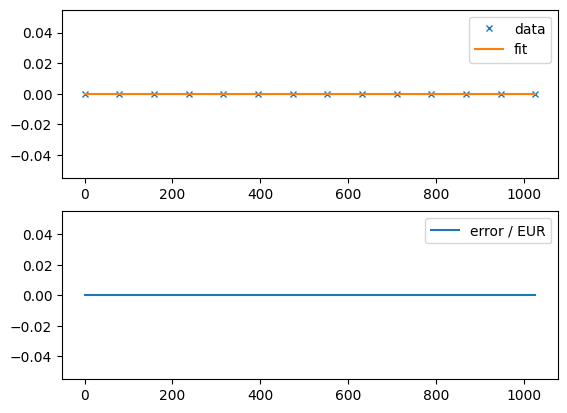

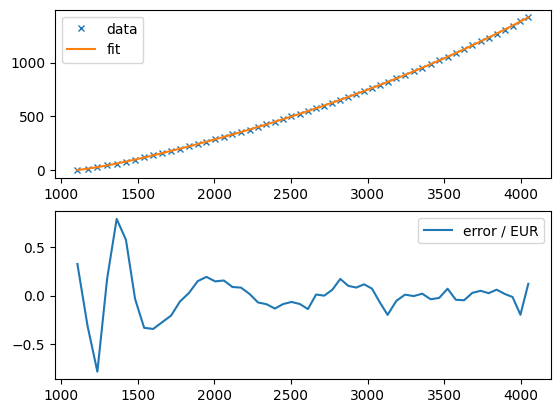

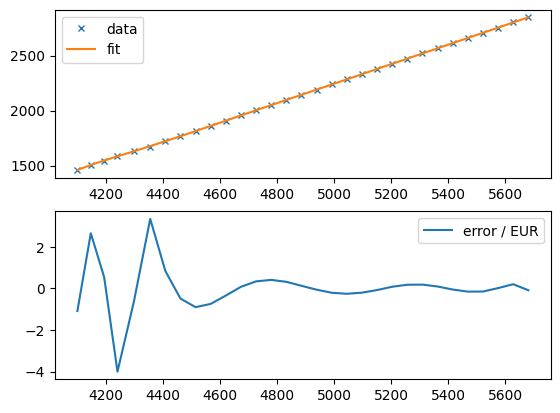

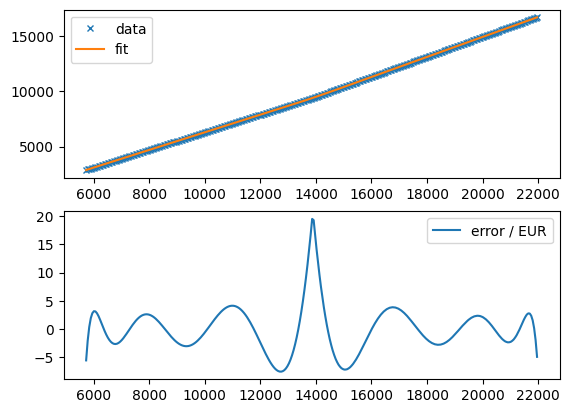

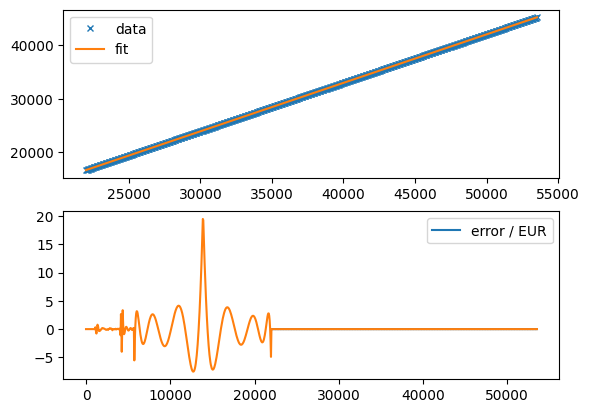

In [6]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 1106,
        "degree": 0,
    },
    {
        "from": 1106,
        "to": 4100,
        "degree": 8,
    },
    {
        "from": 4100,
        "to": 5700,
        "degree": 8,
    },
    {
        "from": 5700,
        "to": 22000,
        "degree": 12,
    },
    {
        "from": 22000,
        "to": 100000,
        "degree": 1,
    }
]

netToTaxPolynomes = []
netIncomeSamples = []
taxSamples = []
estimationSamples = []
estimationErrors = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left')
    netIncomes = df[selector]['net income'].to_numpy()
    taxes = df[selector]['income tax'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    taxSamples = np.append(taxSamples, taxes)

    poly, residuals, _, _, _ = np.polyfit(
        netIncomes, taxes, deg=r['degree'], full=True)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)

    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, taxes, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, taxes)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()

    poly = poly.tolist()
    poly.reverse()
    netToTaxPolynomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)


## Social Security Estimation


[1.01959353e-26]
[51.22339062]
[0.31312962]
[112.23931257]


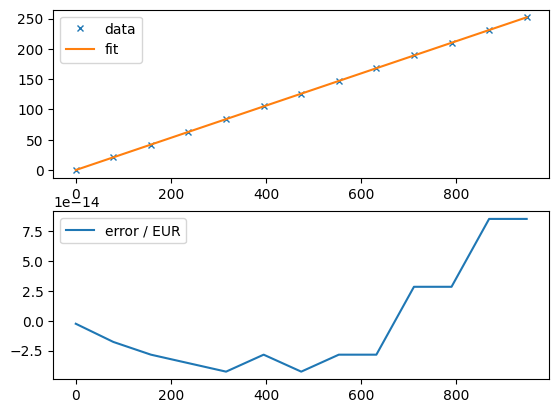

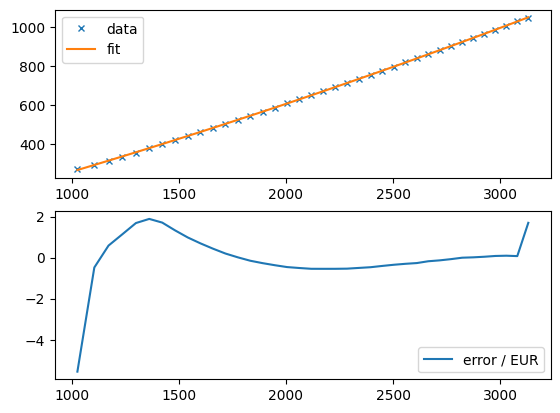

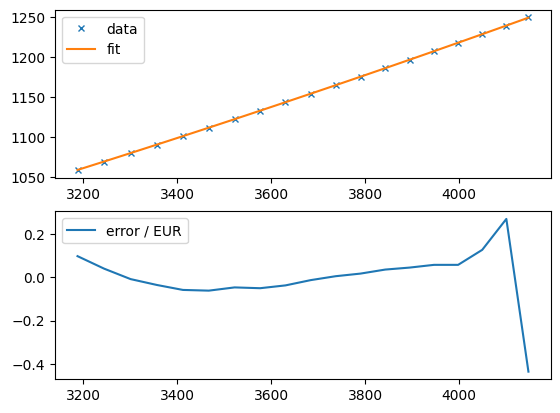

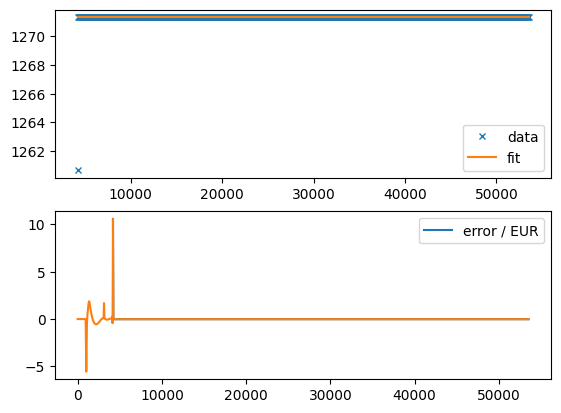

In [7]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 953,
        "degree": 2,
    },
    {
        "from": 953,
        "to": 3142,
        "degree": 2,
    },
    {
        "from": 3142,
        "to": 4192,
        "degree": 2,
    },
    {
        "from": 4192,
        "to": 100000,
        "degree": 0,
    },
]

netIncomeSamples = []
socialSecuritySamples = []
estimationSamples = []
estimationErrors = []
socialSecurityPolonomes = []

# estimate social security payments


for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left')
    netIncomes = df[selector]['net income'].to_numpy()
    ssocialPayments = df[selector]['social security payments'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    socialSecuritySamples = np.append(socialSecuritySamples, ssocialPayments)

    poly, residuals, _, _, _ = np.polyfit(
        netIncomes, ssocialPayments, deg=r['degree'], full=True)
    print(residuals)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)

    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, ssocialPayments, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, ssocialPayments)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()

    poly = poly.tolist()
    poly.reverse()
    socialSecurityPolonomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)


## Export polynomes to be used in JS Library


In [9]:
polynomesJSON = json.dumps({
    "netToTax": netToTaxPolynomes,
    "netToSocialSecurity": socialSecurityPolonomes,
})
print(polynomesJSON)

with open("../src/polynomes-mit-werbungskosten.json", "w") as outfile:
    outfile.write(polynomesJSON)


{"netToTax": [{"from": 0, "to": 1106, "polynome": [-0.0]}, {"from": 1106, "to": 4100, "polynome": [1680.2977003510998, -5.452515743652773, 0.006851187273634009, -4.477415217742408e-06, 1.7386358075718682e-09, -4.0004235232692573e-13, 5.1303822175248e-17, -3.0100791157730812e-21, 3.3270550102044063e-26]}, {"from": 4100, "to": 5700, "polynome": [-213366663.45308927, 346434.767947228, -245.64361909490967, 0.09935152832822683, -2.5070240480752105e-05, 4.04175431601736e-09, -4.0655679222448776e-13, 2.3329559888435082e-17, -5.847281155391851e-22]}, {"from": 5700, "to": 22000, "polynome": [-1777070.5140869278, 1920.3479778928743, -0.9308132995326485, 0.00026764408991570627, -5.082468037392766e-08, 6.716079822636255e-12, -6.33442837784829e-16, 4.29865382694326e-20, -2.084375285096061e-24, 7.047975000022014e-29, -1.5787681362137185e-33, 2.1053711586689782e-38, -1.2651744158411832e-43]}, {"from": 22000, "to": 100000, "polynome": [-3172.3709265243097, 0.9038553069965246]}], "netToSocialSecurity":